# Build Model with Flopy

In [1]:
%matplotlib inline
import os
import flopy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import model dimensions from model.py
from model import nlay, nrow, ncol, proj4_str, rotation, xul, yul, dely, delx

In [2]:
# the proj4 string allows flopy to understand where 
# the model exists in space which makes plotting in 
# real-world coordinates possible
proj4_str

'+proj=utm +zone=17 +north +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=ft +no_defs'

In [3]:
# create a new model object
m = flopy.modflow.Modflow('test',
                          version='mf2005',
                          xul=xul,
                          yul=yul,
                          rotation=rotation,
                          proj4_str=proj4_str,
                          verbose=True)

## Build DIS Package

In [4]:
# import the model top we made
loadpth = r'..\1_preprocess_with_arcpy'
top = np.loadtxt(os.path.join(loadpth, 'dem_ned_ft_mean.ref'))

# create layer bottom. Can be done by repeatedly importing raster
# data onto the grid, but here we'll just make up something easy
botm = top - 100.

# define period lengths, timesteps, etc.
nper = 1
perlen = [1]
nstp = [1]
steady = [True]
itmuni = 4
lenuni = 1
tsmult = [1.]

dis = flopy.modflow.ModflowDis(m,
                               nlay=nlay,
                               nrow=nrow,
                               ncol=ncol,
                               nper=nper,
                               delr=dely,
                               delc=delx,
                               laycbd=0,
                               top=top,
                               botm=botm,
                               perlen=perlen,
                               nstp=nstp,
                               itmuni=itmuni,
                               lenuni=lenuni,
                               steady=steady,
                               tsmult=tsmult)

adding Package:  DIS


## Build BAS6 Package

In [5]:
# set starting heads to top of model
strt = top

# create ibound consisting of all ones
ibound = np.ones_like(top, dtype=int)

bas = flopy.modflow.ModflowBas(m,
                               hnoflo=-999.,
                               ibound=ibound,
                               strt=strt)

adding Package:  BAS6


In [6]:
# write model input files
m.write_input()


Writing packages:
   Package:  DIS
   Package:  BAS6
 


## Plot the Model

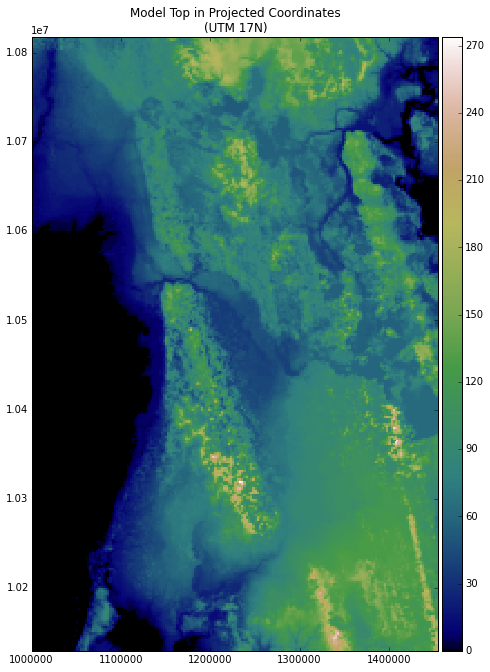

In [7]:
fig = plt.figure(figsize=(8.5, 11))
ax = plt.subplot(111, aspect="equal")
ax.set_title('Model Top in Projected Coordinates\n(UTM 17N)')

# create a ModelMap object
modelmap = flopy.plot.ModelMap(model=m, ax=ax, sr=m.sr)

# plot the model top array from the DIS package of the model
quadmesh = modelmap.plot_array(m.dis.top.array, cmap='gist_earth')

# plot a nice colorbar that is the same height as the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(quadmesh, cax=cax)

plt.show()